<a href="https://colab.research.google.com/github/sbhusal123/Trees-Graph-DS/blob/main/Binary_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tree implementaton as a Class**

In [58]:
class BinaryTree:

  def __init__(self, data):
    self.left = None
    self.right = None
    self.data = data
  
  def insert(self, data):
    # If element already in tree, ignore
    if data == self.data:
      return

    # If less than parent node, insert to left subtree
    if data < self.data:
      if self.left is None:
        self.left = BinaryTree(data)
      else:
        self.left.insert(data)

    # If greater than parent node, insert to right subtree
    else:
      if self.right is None:
        self.right = BinaryTree(data)
      else:
        self.right.insert(data)
      
  def inorder_traversal(self):
    """Visit order: left, root, right"""
    items = []

    # visit left subtree
    if self.left:
      items += self.left.inorder_traversal()
    
    # visit root/base
    items.append(self.data)
    
    # visit right subtree
    if self.right:
      items += self.right.inorder_traversal()
    
    return items
  

  def get_subtree(self, data):
    """Get subtree"""
    if data < self.data:
      return self.left.get_subtree(data)

    if data > self.data:
      return self.right.get_subtree(data)
    
    return self

  
  def preorder_traversal(self):
    """Visit order: root, left, right"""
    items = []

    # visit root/base
    items.append(self.data)

    # visit left subtree:
    if self.left:
      items += self.left.preorder_traversal()
    
    # visit right subtree
    if self.right:
      items += self.right.preorder_traversal()
    
    return items
    
  def postorder_traversal(self):
    """Visi order: left, right, root"""
    items = []

    # visit left subtree
    if self.left:
      items += self.left.postorder_traversal()

    # visit right subtree
    if self.right:
      items += self.right.postorder_traversal()
    
    # visit root/base
    items.append(self.data)
    
    return items
  
  def compute_depth(self, target_node, depth=0):
    """Distance from one node to another"""
    if target_node == self.data:
      return depth
    
    if target_node < self.data:
      if self.left:
        return self.left.compute_depth(target_node, depth+1)
      else:
        return 0

    if target_node > self.data:
      if self.right:
        return self.right.compute_depth(target_node, depth+1)
      else:
        return 0

  def get_leaf_nodes(self, root=None):
    if not self.left and not self.right:
      return [self.data]
    
    if root:
      leaves = self.get_leaf_nodes(self.left) + self.get_left_nodes(self.right)

    return leaves



  def exists(self, data):
    # if lesser than current node value
    if data < self.data:
      if self.left:
        return self.left.exists(data)
      else: return False

    # if greater than current node value
    if data > self.data:
      if self.right:
        return self.right.exists(data)
      else: return False
    
    if data == self.data:
      return True

  def get_leaf_nodes(self):
      """Get the nodes which don't have any left of right sub nodes"""
      leaves = []
      
      # If no child nodes
      if not self.left and not self.right:
          return [self.data]
      
      # If no any left child
      if not self.left:
          leaves = self.right.get_leaf_nodes()
      
      # If no any right child
      if not self.right:
          leaves = self.left.get_leaf_nodes()
      
      # If has left as well left child
      if self.left and self.right:
          leaves = self.left.get_leaf_nodes() + self.right.get_leaf_nodes()
      
      return leaves
  

**Example Tree:**

- Data: [2, 6, 1, 11, 10, 8, 3, 9]
- Equivalent Tree

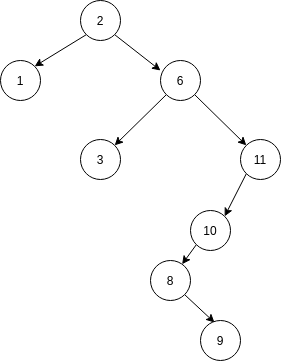

**Create a Tree Out of List**

In [59]:
def create_tree(item):
  bt = BinaryTree(item[0])
  for i in item[1:]:
    bt.insert(i)
  return bt

items = [2, 6, 1, 11, 10, 8, 3, 9]

tree = create_tree(items)

**Traversal:**

In [64]:
print("Pre Order Traversal: (Root, Left, Right)")
print(tree.preorder_traversal())
print("\n")
print("In Order Traversal: (Left, Root, Right)")
print(tree.inorder_traversal())
print("\n")
print("Post Order Traversal: (Left, Right, Root)")
print(tree.postorder_traversal())

Pre Order Traversal: (Root, Left, Right)
[2, 1, 6, 3, 11, 10, 8, 9]


In Order Traversal: (Left, Root, Right)
[1, 2, 3, 6, 8, 9, 10, 11]


Post Order Traversal: (Left, Right, Root)
[1, 3, 9, 8, 10, 11, 6, 2]


**Sub Tree**

In [61]:
sub_tree = tree.get_subtree(6)
print(f"Data: {sub_tree.data}")
print(f"Left Data: {sub_tree.left.data}")
print(f"Right Data: {sub_tree.right.data}")

Data: 6
Left Data: 3
Right Data: 11


**Depth from one node to other, Existence of data:**

In [62]:
print("Depth from 6 to 9")
print(tree.get_subtree(6).compute_depth(9))

print("\n")
print("Does 6 exists ??")
print(tree.exists(9))

Depth from 6 to 9
4


Does 6 exists ??
True


**Leaf Nodes:**

In [63]:
tree.get_leaf_nodes()

[1, 3, 9]